** Neural Network (NN) -  Boston Housing Price **



Urutan contoh program CNN untuk digit recognation yang akan dibahas terdiri dari beberapa bagian, yaitu :
1.   Inisialisasi Libraries (Import)
2.   Load Dataset
3.   Scale Data
4.   Model NN
5.   Evaluasi Model
6.   Hasil (Visualisasi)
  
    
**Inisialisasi Libraries (Import)**

Librari yang digunakan meliputi beberapa librasi standar serta librari tensorflow. Librari tensorflow memudahkan kita untuk melakukan pengkodean secara cepat fungsi serta pemanggilan dataset (dataset boston_housing, fungsi Dense layer, dll)

In [ ]:
import numpy as np
from tensorflow.keras.datasets import boston_housing
from keras import models
from keras import layers
import matplotlib.pyplot as plt
%matplotlib inline 

**Load Dataset**


Dataset Boston Housing disediakan tensorflow keras sehingga memudahkan dalam Dataset boston Housing merupakan kumpulan data yang diambil dari perpustakaan StatLib yang dikelola di Universitas Carnegie Mellon. Sampel berisi 13 atribut rumah di lokasi yang berbeda di sekitar pinggiran kota Boston pada akhir 1970-an. 

In [ ]:
# load train and test dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

**Scale Data**

Kita harus menskalakan data karena diwakili dalam rentang yang berbeda, beberapa kasus data memiliki tingkat kejahatan dari 0 hingga 12 dan yang lainnya dari 0 hingga 1.

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

**Model Neural Network - Regression**



In [ ]:
def build_model():
    model = models.Sequential([
        layers.Dense(64, activation="relu", input_shape=(train_data.shape[1], )),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

**Evaluasi Model**

Secara umum, menerapkan validasi silang k-fold ketika data yang tersedia terbatas merupakan solusi yang baik

In [ ]:
k = 4
num_val_samples = train_data.shape[0] // 4
num_epochs = 50
all_scores = []

for i in range(k):
    print("Processing fold #", i + 1)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
     
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1,
                        verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("Processing fold #", i + 1)
    val_data = train_data[i * num_val_samples:(i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0
    )
     
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0
    )
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, 
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1,
                        verbose=0)

    mae_history = history.history["mae"]
    all_mae_histories.append(mae_history)

average_mae_history = [
    np.mean([ x[i] for x in all_mae_histories ]) for i in range(num_epochs)
]


**Hasil**




In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel('Validation MAE')
plt.show()

**Visualisasi Hasil**



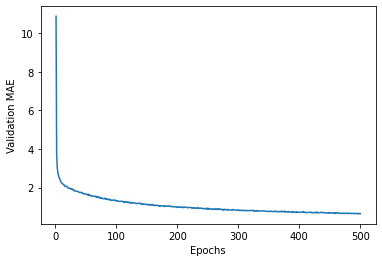